In [1]:
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Datasets/SeoulMetro'

In [3]:
df = pd.read_csv(f'{DATA_PATH}/num_humans.csv', encoding = 'cp949')
df.sample(5).T

,13549,6633,10620,8720,6990
사용일자,20230812,20230824,20230817,20230820,20230823
호선명,경부선,7호선,서해선,경의선,2호선
역명,당정,중화,부천종합운동장,디지털미디어시티,상왕십리
승차총승객수,3916,11313,634,1696,15150
하차총승객수,3541,11028,1658,1480,14833
등록일자,20230815,20230827,20230820,20230823,20230826


In [4]:
matplotlib.matplotlib_fname()

'/opt/conda/envs/ml/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'

In [5]:
df         = df[['사용일자', '호선명', '승차총승객수', '하차총승객수']]
lines      = set(sorted(df['호선명']))
dates      = set(sorted([str(date) for date in df['사용일자']]))

sum_pivots = lambda line, value: pd.pivot_table(df[df['호선명'] == line], index = '사용일자',
                                         columns = '호선명', values = value, aggfunc = 'sum')
riding_df  = [sum_pivots(line, '승차총승객수') for line in lines]
quit_df    = [sum_pivots(line, '하차총승객수') for line in lines]

/opt/conda/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
/opt/conda/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
/opt/conda/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52632 (\N{HANGUL SYLLABLE CUN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  func(*args, **kwargs)
/opt/conda/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49328 (\N{HANGUL SY

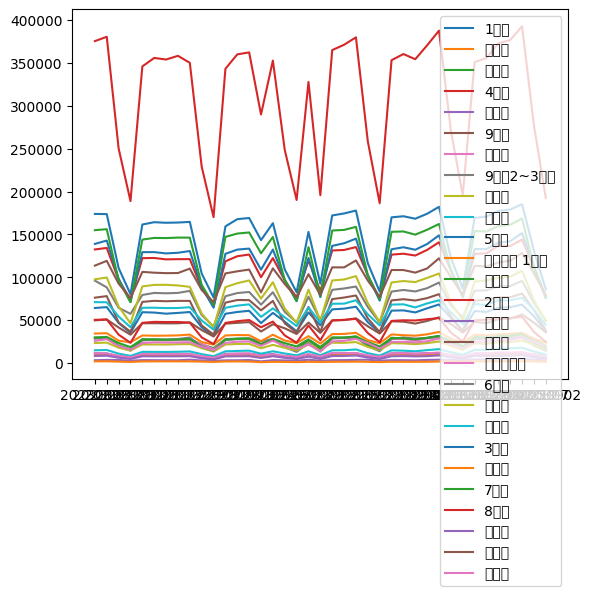

In [6]:
for riding in riding_df:
    label = riding.columns.to_list()[0]
    plt.plot(list(dates), riding.values/4, label = label)
    
plt.legend()